### Exercise 1

#### Review of data wrangling and visualization in Python

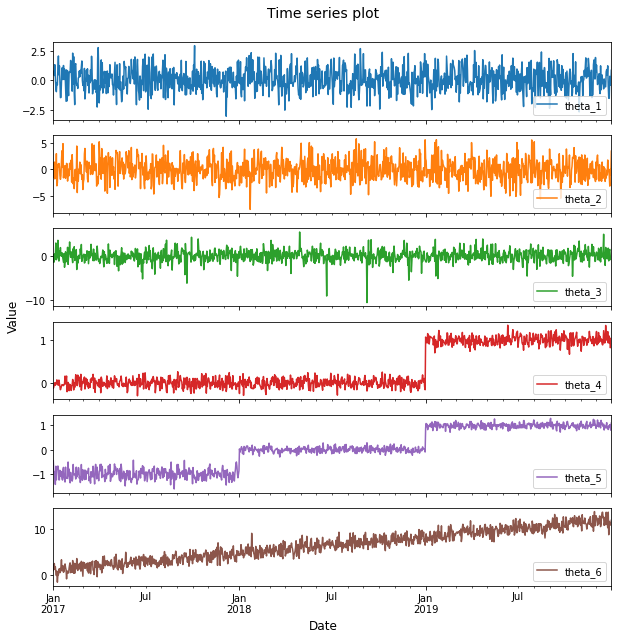

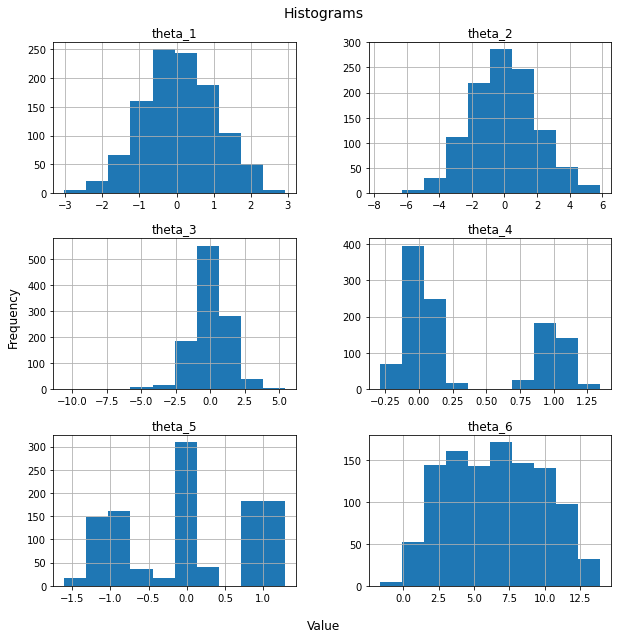

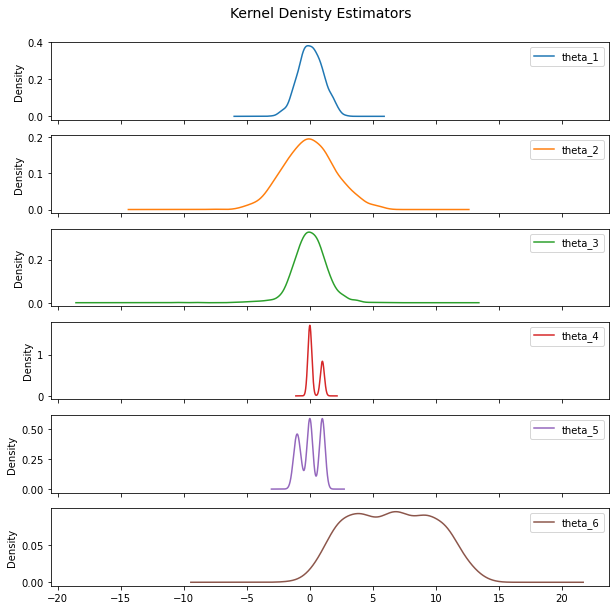

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data1.csv', index_col=0, parse_dates=True)

axes = df.plot(subplots=True, figsize=(10,10))
for ax in axes:
    ax.legend(loc='lower right')
fig=axes[0].figure
fig.text(0.5,0.92, 'Time series plot', ha='center', va='center', size=14)
fig.text(0.5,0.07, 'Date', ha='center', va='center', size=12)
fig.text(0.07,0.5, 'Value', ha='center', va='center', rotation=90, size=12)
plt.show()

axes = df.hist(figsize=(10,10), bins=10)
fig=axes[0][0].figure
fig.text(0.5,0.92, 'Histograms', ha='center', va='center', size=14)
fig.text(0.5,0.07, 'Value', ha='center', va='center', size=12)
fig.text(0.07,0.5, 'Frequency', ha='center', va='center', rotation=90, size=12)
plt.show()

axes = df.plot.density(subplots=True, figsize=(10,10))
fig=axes[0].figure
fig.text(0.5,0.92, 'Kernel Denisty Estimators', ha='center', va='center', size=14)
plt.show()

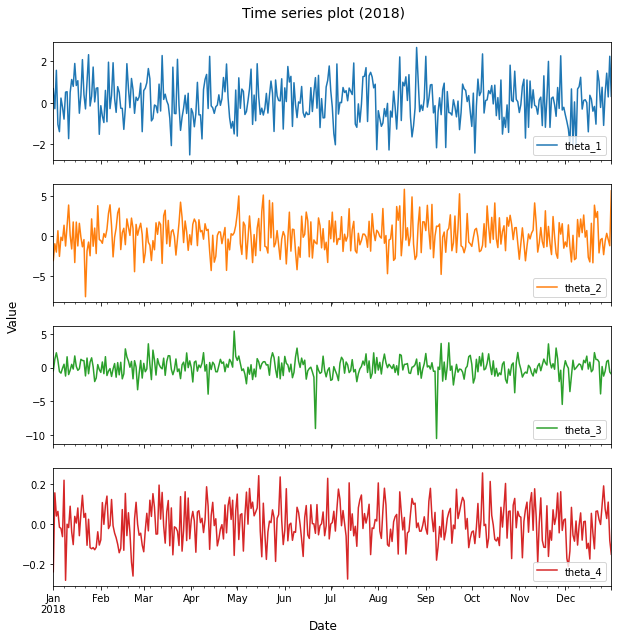

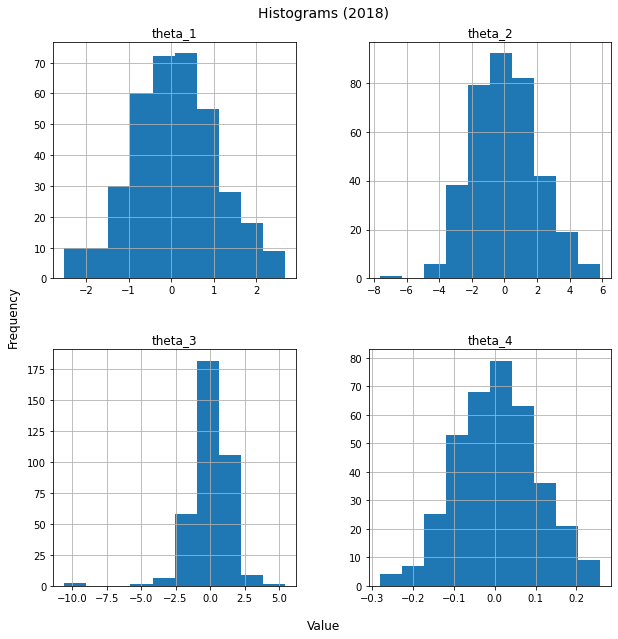

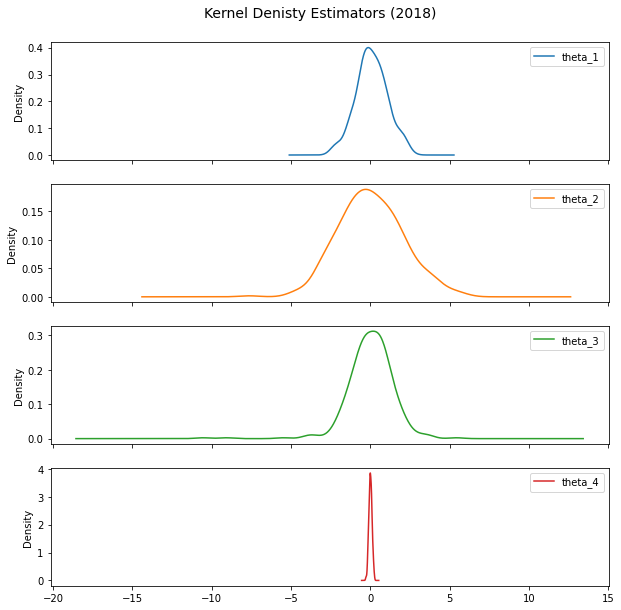

In [4]:
df_2 = df.loc['2018', 'theta_1':'theta_4']

axes = df_2.plot(subplots=True, figsize=(10,10))
for ax in axes:
    ax.legend(loc='lower right')
fig=axes[0].figure
fig.text(0.5,0.92, 'Time series plot (2018)', ha='center', va='center', size=14)
fig.text(0.5,0.07, 'Date', ha='center', va='center', size=12)
fig.text(0.07,0.5, 'Value', ha='center', va='center', rotation=90, size=12)
plt.show()

axes = df_2.hist(figsize=(10,10), bins=10)
fig=axes[0][0].figure
fig.text(0.5,0.92, 'Histograms (2018)', ha='center', va='center', size=14)
fig.text(0.5,0.07, 'Value', ha='center', va='center', size=12)
fig.text(0.07,0.5, 'Frequency', ha='center', va='center', rotation=90, size=12)
plt.show()

axes = df_2.plot.density(subplots=True, figsize=(10,10))
fig=axes[0].figure
fig.text(0.5,0.92, 'Kernel Denisty Estimators (2018)', ha='center', va='center', size=14)
plt.show()

### Exercise 2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: E:/Programowanie/Microsoft VS Code Projects/Lab_1/bern_1.exe
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


CmdStanModel: name=bern_1
	 stan_file=E:\Programowanie\Microsoft VS Code Projects\Lab_1\bern_1.stan
	 exe_file=E:/Programowanie/Microsoft VS Code Projects/Lab_1/bern_1.exe
	 compiler_options=stanc_options=None, cpp_options=None


         Mean    MCSE  StdDev     5%    50%    95%   N_Eff  N_Eff/s  R_hat
name                                                                     
lp__  -13.00  0.0170    0.69 -14.00 -12.00 -12.00  1600.0  12000.0    1.0
theta   0.61  0.0027    0.11   0.43   0.62   0.78  1700.0  12000.0    1.0 




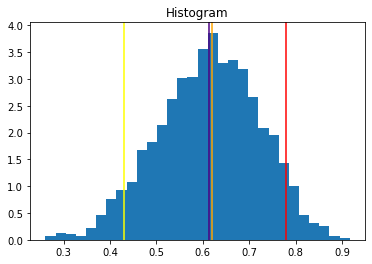

In [36]:
from cmdstanpy import CmdStanModel

dataset = {"N":16, "y":[1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0]}
model = CmdStanModel(stan_file="bern_1.stan")
print(model)

model_sample = model.sample(data=dataset, output_dir='out')
theta = model_sample.stan_variable(name='theta')

df=model_sample.summary()
df_theta = df.loc['theta']
quan_5=df_theta['5%']
quan_95=df_theta['95%']
quan_50=df_theta['50%']
print('\n\n',df,'\n\n')

axes = plt.hist(theta, bins=30, density=True)
plt.axvline(theta.mean(), color='indigo')
plt.axvline(quan_5, color='yellow')
plt.axvline(quan_50, color='orange')
plt.axvline(quan_95, color='red')
plt.title('Histogram')
plt.show()